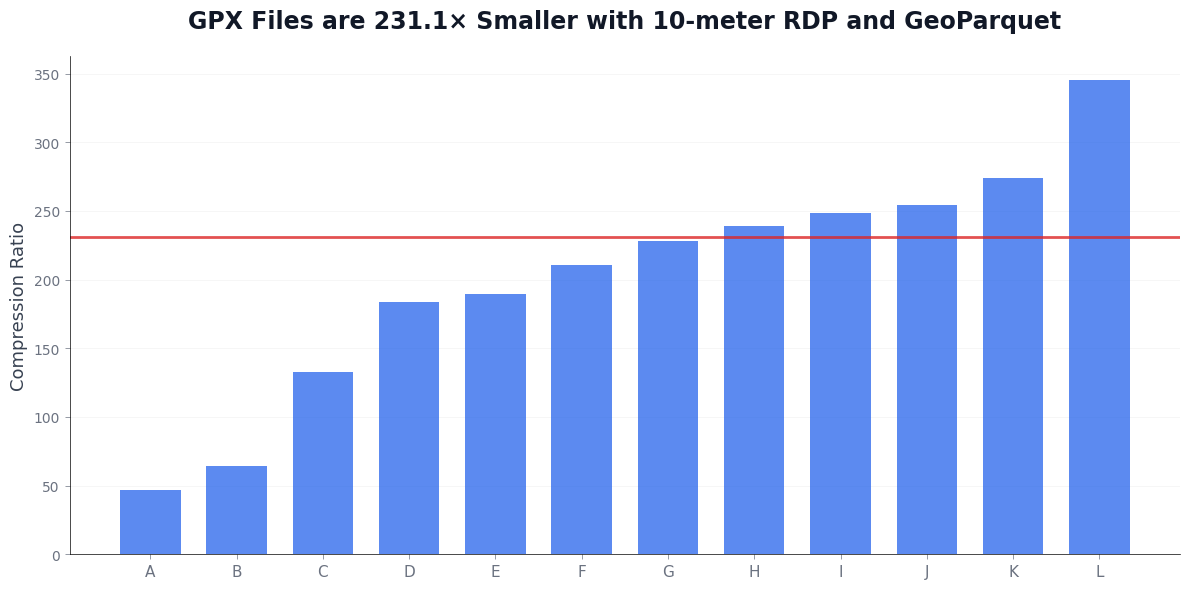


Overall Compression Ratio: 219.2×
Total Original Size: 618.483 MB
Total Parquet Size: 2.821 MB
Space Saved: 99.5%

Datasets grouped into 12 bars


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('/content/compression_stats.csv')

# Calculate compression ratio for each row
df['compression_ratio'] = df['original_gpx_mb'] / df['parquet_mb']

# Remove outliers (0 or invalid values)
df = df[df['compression_ratio'] > 0]
df = df[np.isfinite(df['compression_ratio'])]

# Sort by compression ratio
df_sorted = df.sort_values('compression_ratio').reset_index(drop=True)

# Group into bins (10-15 bars)
n_bins = min(12, len(df_sorted))
bin_size = len(df_sorted) // n_bins
grouped_ratios = []

for i in range(n_bins):
    start_idx = i * bin_size
    end_idx = start_idx + bin_size if i < n_bins - 1 else len(df_sorted)
    group_mean = df_sorted['compression_ratio'].iloc[start_idx:end_idx].mean()
    grouped_ratios.append(group_mean)

# Calculate overall compression ratio
total_original = df['original_gpx_mb'].sum()
total_parquet = df['parquet_mb'].sum()
overall_compression = total_original / total_parquet

# Create zen-style plot
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')

# Bar chart
x = range(len(grouped_ratios))
bars = ax.bar(x, grouped_ratios, color='#2563eb', alpha=0.75, width=0.7)

# Median line
median_ratio = df['compression_ratio'].median()
ax.axhline(y=median_ratio, color='#dc2626', linewidth=2, linestyle='-', alpha=0.8)

# Minimal styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_ylabel('Compression Ratio', fontsize=13, color='#374151')
ax.tick_params(colors='#6b7280', width=0.5)
ax.set_xticks(x)
ax.set_xticklabels([chr(65 + i) for i in x], fontsize=11, color='#6b7280')
ax.set_xlabel('')

# Title
ax.set_title(f'GPX Files are {median_ratio:.1f}× Smaller with 10-meter RDP and GeoParquet',
             fontsize=17, fontweight='600', color='#111827', pad=20)

# Add subtle grid
ax.grid(axis='y', alpha=0.15, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('/content/compression_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Print results
print(f"\nOverall Compression Ratio: {overall_compression:.1f}×")
print(f"Total Original Size: {total_original:.3f} MB")
print(f"Total Parquet Size: {total_parquet:.3f} MB")
print(f"Space Saved: {(1 - total_parquet/total_original)*100:.1f}%")
print(f"\nDatasets grouped into {len(grouped_ratios)} bars")